In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psutil
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import FactorAnalysis

from openTSNE import TSNE


In [2]:
digits = pd.read_csv('train.csv')

In [3]:
psutil.Process().memory_info().rss / (1024 * 1024)

674.359375

In [4]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
digits[digits.label==0].shape

(4132, 785)

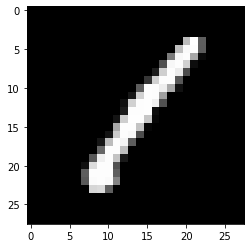

In [6]:
a = digits.iloc[0,1:].values.reshape(28, 28)
plt.imshow(a,cmap='gray')

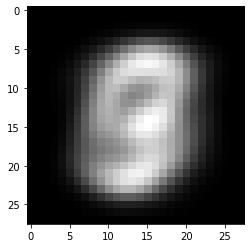

In [7]:
all_digits = digits.iloc[:,1:].values.reshape(42000,28, 28)
plt.imshow(all_digits.mean(axis=0),cmap='gray')

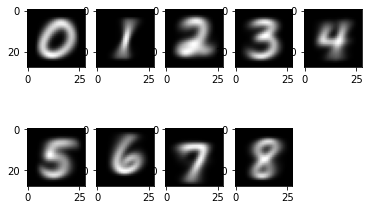

In [8]:
# Average by number
for i in range(0,9):
    num=250 + 1 + i
    plt.subplot(num)
    img =  digits[digits.label==i]
    img = img.iloc[:,1:].values\
                  .reshape(img.shape[0],28, 28)\
                  .mean(axis=0)
    plt.imshow(img,cmap='gray')
plt.show()

# Factyor analysis

In [10]:
FA_model = FactorAnalysis(n_components=3,rotation="varimax").fit_transform(digits.iloc[:,1:])

In [11]:
FA_df = pd.DataFrame(FA_model)
FA_df.columns = ['factor_1','factor_2','factor_3']
FA_df['label'] = digits.label

<AxesSubplot:xlabel='factor_1', ylabel='factor_2'>

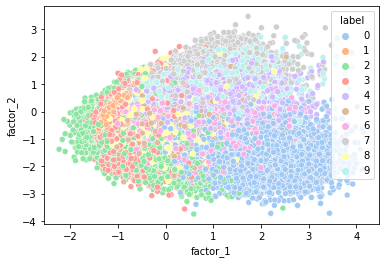

In [12]:
sns.scatterplot(data=FA_df,x='factor_1',y='factor_2',hue='label',palette='pastel')

<AxesSubplot:xlabel='factor_2', ylabel='factor_3'>

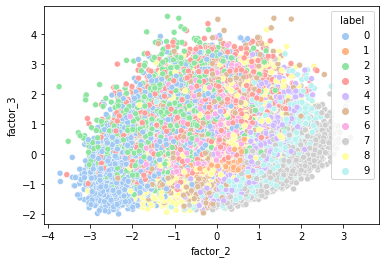

In [13]:
sns.scatterplot(data=FA_df,x='factor_2',y='factor_3',hue='label',palette='pastel')

<AxesSubplot:xlabel='factor_3', ylabel='factor_1'>

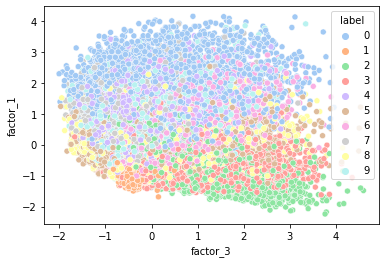

In [14]:
sns.scatterplot(data=FA_df,x='factor_3',y='factor_1',hue='label',palette='pastel')

In [15]:
X = FA_df[['factor_1','factor_2','factor_3']]
y = FA_df.label
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [16]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
clf.score(x_test,y_test)

0.5225829725829726

# TSNE

In [ ]:
# from sklearn.manifold import TSNE as tsneee
# tsne = tsneee(n_components=2, n_iter=250,n_jobs=-1).fit_transform(x_train.iloc[:,1:].values)

In [69]:
X = digits.iloc[:,1:]
y = digits.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=10)
x_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)

In [52]:
tsne = TSNE(n_components=2,
            perplexity=30,
            n_iter=250,
            metric="euclidean",
            n_jobs=-1,
            random_state=10,
            verbose=True)

In [53]:
embedding_train = tsne.fit(x_train.values)

--------------------------------------------------------------------------------
TSNE(n_iter=250, n_jobs=-1, random_state=10, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 17.07 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.15 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 1.33 seconds
===> Running optimization with exaggeration=12.00, lr=2345.00 for 250 iterations...
Iteration   50, KL divergence 5.8550, 50 iterations in 1.5040 sec
Iteration  100, KL divergence 5.4301, 50 iterations in 1.5149 sec
Iteration  150, KL divergence 5.3523, 50 iterations in 1.6417 sec
Iteration  200, KL divergence 5.3233, 50 iterations in 1.5245 sec
Iteration  250, KL divergence 5.3090, 50 iterations in 1.8778 sec
   --> Time elapsed: 8.06 seconds
===> Running optimization with exaggeration=1.00, lr=2

<AxesSubplot:xlabel='f1', ylabel='f2'>

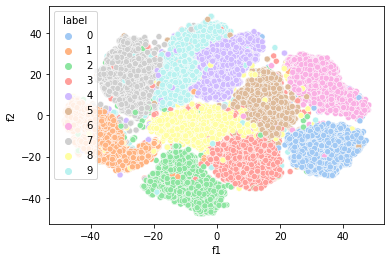

In [54]:
aux = pd.DataFrame(embedding_train)
aux.columns = ['f1','f2']
aux['label'] = y_train.values
sns.scatterplot(data=aux,x='f1',y='f2',hue='label',palette='pastel')

In [55]:
clf = RandomForestClassifier(random_state=42)
clf.fit(aux[['f1','f2']], aux.label)
clf.score(aux[['f1','f2']],aux.label)

0.9999289267945984

In [56]:
aux['prediction'] = clf.predict(aux[['f1','f2']])
x_train['prediction'] = clf.predict(aux[['f1','f2']])

In [58]:
aux[aux.label!=aux.prediction]

,f1,f2,label,prediction
19159,-11.796026,29.832324,4,9
28103,-19.005940,-37.265441,9,2


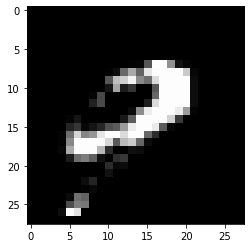

In [60]:
a = x_train.loc[28103][:784].values.reshape(28, 28)
plt.imshow(a,cmap='gray')

In [66]:
embedding_test = embedding_train.transform(x_test.values)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 4.10 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.10 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 198133.6362, 50 iterations in 0.5186 sec
Iteration  100, KL divergence 196986.8728, 50 iterations in 0.5358 sec
Iteration  150, KL divergence 196417.0669, 50 iterations in 0.5319 sec
Iteration  200, KL divergence 196098.5033, 50 iterations in 0.7285 sec
Iteration  250, KL divergence 195882.3129, 50 iterations in 0.5434 sec
   --> Time elapsed: 2.86 seconds


<AxesSubplot:xlabel='f1', ylabel='f2'>

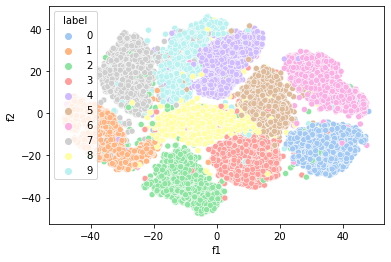

In [67]:
aux_test = pd.DataFrame(embedding_test)
aux_test.columns=['f1','f2']
aux_test['label'] = y_test.values
sns.scatterplot(data=aux_test,x='f1',y='f2',hue='label',palette='pastel')

In [68]:
clf.score(aux_test[['f1','f2']],aux_test.label)

0.946969696969697

In [70]:
aux_test['prediction'] = clf.predict(aux_test[['f1','f2']])
x_test['prediction'] = clf.predict(aux_test[['f1','f2']])

In [71]:
aux_test[aux_test.label!=aux_test.prediction]

,f1,f2,label,prediction
28,34.803054,-11.505659,2,0
46,15.842767,-7.033675,8,5
62,-13.401274,38.193898,4,9
85,-21.314288,-15.009636,4,1
121,-7.222414,-15.085863,2,8
...,...,...,...,...
13698,1.342569,3.346870,3,8
13718,-2.748439,-23.272881,1,5
13730,-3.316796,-27.451118,8,2
13742,-7.615273,17.494499,8,9


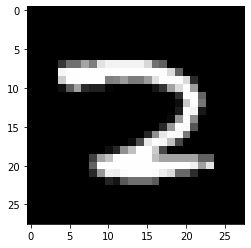

In [74]:
a = x_test.loc[13833][:784].values.reshape(28, 28)
plt.imshow(a,cmap='gray')

In [34]:
test_kaggle = pd.read_csv('test.csv')
test_kaggle = embedding_train.transform(test_kaggle.values)
test_kaggle = pd.DataFrame(test_kaggle)
test_kaggle.columns=['f1','f2']

pred = pd.DataFrame(clf.predict(test_kaggle))
pred['ImageId'] = range(1,pred.shape[0]+1)
pred.columns=['Label','ImageId']
pred[['ImageId','Label']].to_csv('submition.csv',index=False)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 7.79 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.20 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 411814.5864, 50 iterations in 1.0498 sec
Iteration  100, KL divergence 408067.7150, 50 iterations in 0.9509 sec
Iteration  150, KL divergence 405766.8821, 50 iterations in 1.1483 sec
Iteration  200, KL divergence 404239.9476, 50 iterations in 1.1572 sec
Iteration  250, KL divergence 403122.7586, 50 iterations in 1.1313 sec
   --> Time elapsed: 5.44 seconds


# NN